## XGBoost - GASIF H2/CO - 2bins - 70/30

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, cohen_kappa_score, r2_score, mean_absolute_error, root_mean_squared_error
from xgboost import XGBClassifier, XGBRegressor
import matplotlib.pyplot as plt
from sklearn import metrics
import pycm
from ast import literal_eval
import sys
sys.path.append("../plotutils/")
from plotutils import *
plt.style.use("../plotutils/your.mplstyle")

In [2]:
df = pd.read_csv(f"../GasificationBiomass_dataset.csv", sep=';')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   BIOMASS_name         50 non-null     object 
 1   BIOMASS              50 non-null     object 
 2   HHVbiom (MJ/kg)      50 non-null     float64
 3   C (%)                50 non-null     float64
 4   H (%)                50 non-null     float64
 5   O (%)                50 non-null     float64
 6   ash (%)              50 non-null     float64
 7   VM (%)               50 non-null     float64
 8   FC (%)               50 non-null     float64
 9   MC (%)               50 non-null     float64
 10  volCO (%)            50 non-null     float64
 11  volH2 (%)            50 non-null     float64
 12  volCH4 (%)           50 non-null     float64
 13  volCO2 (%)           50 non-null     float64
 14  volCOMB (%)          50 non-null     float64
 15  H2_CO                50 non-null     float

In [3]:
def prepare_dataset_classification(
    df,
    target = "H2_CO_1.8",
    representation = list(df.iloc[:,2:10].columns),
    random_state=42,
    train_size=30
):
    df_train, df_val_test = train_test_split(
        df,
        train_size=train_size,
        random_state=random_state,
        stratify=df[target].astype(int).values,
    )
    print(len(df_train), len(df_val_test))
    
    df_val, df_test = train_test_split(
        df_val_test,
        train_size=0.5,
        random_state=random_state,
        stratify=df_val_test[target].astype(int).values,
    )
    print(len(df_val), len(df_test))
    
    X_train, y_train = df_train[representation], df_train[target]
    X_val, y_val = df_val[representation], df_val[target]
    X_test, y_test = df_test[representation], df_test[target]
    
    return X_train, y_train, X_val, y_val, X_test, y_test

In [4]:
def train_and_evaluate_classifier(X_train, y_train, X_val, y_val, X_test, y_test, random_state=42):
    clf = XGBClassifier(
        #learning_rate = 0.1,
        n_estimators=200, 
        random_state=random_state, 
        early_stopping_rounds=10,
        objective="binary:logistic",
        #use_label_encoder=False, 
        eval_metric="logloss"
    )
    
    clf.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_val, y_val)], verbose=5)
    
    y_pred = clf.predict(X_test)
    y_test = np.array(y_test)
    
    acc = accuracy_score(y_test, y_pred)
    f1_macro = f1_score(y_test, y_pred, average="macro")
    f1_micro = f1_score(y_test, y_pred, average="micro")
    f1_weighted = f1_score(y_test, y_pred, average='weighted')
    kappa = cohen_kappa_score(y_test, y_pred)
    
    return y_test, y_pred, acc, f1_macro, f1_micro, f1_weighted, kappa

In [5]:
def metrics_dict():
    metrics_dict = {
        "train_size": train_size,
        "y_true": y_test_all,
        "y_pred": y_pred_all,
        "accuracy": acc_scores,
        "f1_macro": f1macro_scores,
        "f1_micro": f1micro_scores,
        "f1_weighted": f1weighted_scores,
        "kappa": kappa_scores
    }
    return metrics_dict

### training size = 5

In [6]:
train_size = 5
iterations = 10
y_test_all = []
y_pred_all = []
acc_scores = []
f1macro_scores = []
f1micro_scores = []
f1weighted_scores = []
kappa_scores = []

In [7]:
for n in range(iterations):
    print(f"-------------Iteration {n + 1}/{iterations}")
    random_state=42+n

    X_train, y_train, X_val, y_val, X_test, y_test = prepare_dataset_classification(
        df,
        random_state=random_state,
        train_size=train_size
    )
    print(f"random_state = {random_state}")

    y_test, y_pred, acc, f1_macro, f1_micro, f1_weighted, kappa = train_and_evaluate_classifier(
        X_train, 
        y_train, 
        X_val, 
        y_val,
        X_test, 
        y_test, 
        random_state=random_state
    )
    
    y_test_all.append(y_test)
    y_pred_all.append(y_pred)    
    acc_scores.append(acc)
    f1macro_scores.append(f1_macro)
    f1micro_scores.append(f1_micro)
    f1weighted_scores.append(f1_weighted)
    kappa_scores.append(kappa)
    print(f"Accuracy: {acc}")
    print(f"F1 macro: {f1_macro}")
    print(f"F1 micro: {f1_micro}")
    print(f"F1 weighted: {f1_weighted}")
    print(f"Kappa: {kappa}")

-------------Iteration 1/10
5 45
22 23
random_state = 42
[0]	validation_0-logloss:0.67301	validation_1-logloss:0.62199
[5]	validation_0-logloss:0.67301	validation_1-logloss:0.62165
[10]	validation_0-logloss:0.67301	validation_1-logloss:0.62150
[15]	validation_0-logloss:0.67301	validation_1-logloss:0.62145
[20]	validation_0-logloss:0.67301	validation_1-logloss:0.62142
[25]	validation_0-logloss:0.67301	validation_1-logloss:0.62141
[30]	validation_0-logloss:0.67301	validation_1-logloss:0.62141
[35]	validation_0-logloss:0.67301	validation_1-logloss:0.62141
[40]	validation_0-logloss:0.67301	validation_1-logloss:0.62141
[45]	validation_0-logloss:0.67301	validation_1-logloss:0.62141
[50]	validation_0-logloss:0.67301	validation_1-logloss:0.62141
[55]	validation_0-logloss:0.67301	validation_1-logloss:0.62141
[60]	validation_0-logloss:0.67301	validation_1-logloss:0.62141
[65]	validation_0-logloss:0.67301	validation_1-logloss:0.62141
[68]	validation_0-logloss:0.67301	validation_1-logloss:0.62141


[20]	validation_0-logloss:0.67301	validation_1-logloss:0.62142
[25]	validation_0-logloss:0.67301	validation_1-logloss:0.62141
[30]	validation_0-logloss:0.67301	validation_1-logloss:0.62141
[35]	validation_0-logloss:0.67301	validation_1-logloss:0.62141
[40]	validation_0-logloss:0.67301	validation_1-logloss:0.62141
[45]	validation_0-logloss:0.67301	validation_1-logloss:0.62141
[50]	validation_0-logloss:0.67301	validation_1-logloss:0.62141
[55]	validation_0-logloss:0.67301	validation_1-logloss:0.62141
[60]	validation_0-logloss:0.67301	validation_1-logloss:0.62141
[65]	validation_0-logloss:0.67301	validation_1-logloss:0.62141
[68]	validation_0-logloss:0.67301	validation_1-logloss:0.62141
Accuracy: 0.6956521739130435
F1 macro: 0.41025641025641024
F1 micro: 0.6956521739130435
F1 weighted: 0.5707915273132664
Kappa: 0.0


In [8]:
print(f"FINAL REPORT for training size = {train_size}")

print(f"mean accuracy: {np.mean(acc_scores)} +/- {np.std(acc_scores)}")
print(f"mean F1 macro: {np.mean(f1macro_scores)} +/- {np.std(f1macro_scores)}")
print(f"mean F1 micro: {np.mean(f1micro_scores)} +/- {np.std(f1micro_scores)}")
print(f"mean F1 weighted: {np.mean(f1weighted_scores)} +/- {np.std(f1weighted_scores)}")
print(f"mean Kappa: {np.mean(kappa_scores)} +/- {np.std(kappa_scores)}")

FINAL REPORT for training size = 5
mean accuracy: 0.6956521739130433 +/- 1.1102230246251565e-16
mean F1 macro: 0.41025641025641024 +/- 0.0
mean F1 micro: 0.6956521739130433 +/- 1.1102230246251565e-16
mean F1 weighted: 0.5707915273132664 +/- 0.0
mean Kappa: 0.0 +/- 0.0


In [9]:
compiled_res_5 = pd.DataFrame(metrics_dict())
compiled_res_5.head(3)

,train_size,y_true,y_pred,accuracy,f1_macro,f1_micro,f1_weighted,kappa
0,5,"[0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.695652,0.410256,0.695652,0.570792,0.0
1,5,"[0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.695652,0.410256,0.695652,0.570792,0.0
2,5,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.695652,0.410256,0.695652,0.570792,0.0


### training size = 10

In [10]:
train_size = 10
iterations = 10
y_test_all = []
y_pred_all = []
acc_scores = []
f1macro_scores = []
f1micro_scores = []
f1weighted_scores = []
kappa_scores = []

In [11]:
for n in range(iterations):
    print(f"-------------Iteration {n + 1}/{iterations}")
    random_state=42+n

    X_train, y_train, X_val, y_val, X_test, y_test = prepare_dataset_classification(
        df,
        random_state=random_state,
        train_size=train_size
    )
    print(f"random_state = {random_state}")

    y_test, y_pred, acc, f1_macro, f1_micro, f1_weighted, kappa = train_and_evaluate_classifier(
        X_train, 
        y_train, 
        X_val, 
        y_val,
        X_test, 
        y_test, 
        random_state=random_state
    )
    
    y_test_all.append(y_test)
    y_pred_all.append(y_pred)    
    acc_scores.append(acc)
    f1macro_scores.append(f1_macro)
    f1micro_scores.append(f1_micro)
    f1weighted_scores.append(f1_weighted)
    kappa_scores.append(kappa)
    print(f"Accuracy: {acc}")
    print(f"F1 macro: {f1_macro}")
    print(f"F1 micro: {f1_micro}")
    print(f"F1 weighted: {f1_weighted}")
    print(f"Kappa: {kappa}")

-------------Iteration 1/10
10 40
20 20
random_state = 42
[0]	validation_0-logloss:0.55084	validation_1-logloss:0.55756
[5]	validation_0-logloss:0.51878	validation_1-logloss:0.48006
[10]	validation_0-logloss:0.51871	validation_1-logloss:0.48000
[15]	validation_0-logloss:0.51871	validation_1-logloss:0.47999
[20]	validation_0-logloss:0.51870	validation_1-logloss:0.47999
[25]	validation_0-logloss:0.51870	validation_1-logloss:0.47999
[30]	validation_0-logloss:0.51870	validation_1-logloss:0.47999
[35]	validation_0-logloss:0.51870	validation_1-logloss:0.47999
[38]	validation_0-logloss:0.51870	validation_1-logloss:0.47999
Accuracy: 0.7
F1 macro: 0.4117647058823529
F1 micro: 0.7
F1 weighted: 0.5764705882352941
Kappa: 0.0
-------------Iteration 2/10
10 40
20 20
random_state = 43
[0]	validation_0-logloss:0.55084	validation_1-logloss:0.57100
[5]	validation_0-logloss:0.47787	validation_1-logloss:0.51470
[10]	validation_0-logloss:0.47261	validation_1-logloss:0.51925
[15]	validation_0-logloss:0.4726

In [12]:
print(f"FINAL REPORT for training size = {train_size}")

print(f"mean accuracy: {np.mean(acc_scores)} +/- {np.std(acc_scores)}")
print(f"mean F1 macro: {np.mean(f1macro_scores)} +/- {np.std(f1macro_scores)}")
print(f"mean F1 micro: {np.mean(f1micro_scores)} +/- {np.std(f1micro_scores)}")
print(f"mean F1 weighted: {np.mean(f1weighted_scores)} +/- {np.std(f1weighted_scores)}")
print(f"mean Kappa: {np.mean(kappa_scores)} +/- {np.std(kappa_scores)}")

FINAL REPORT for training size = 10
mean accuracy: 0.7 +/- 0.0
mean F1 macro: 0.4117647058823529 +/- 0.0
mean F1 micro: 0.7 +/- 0.0
mean F1 weighted: 0.5764705882352941 +/- 0.0
mean Kappa: 0.0 +/- 0.0


In [13]:
compiled_res_10 = pd.DataFrame(metrics_dict())
compiled_res_10.head(3)

,train_size,y_true,y_pred,accuracy,f1_macro,f1_micro,f1_weighted,kappa
0,10,"[0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.7,0.411765,0.7,0.576471,0.0
1,10,"[0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.7,0.411765,0.7,0.576471,0.0
2,10,"[1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.7,0.411765,0.7,0.576471,0.0


### training size = 15

In [14]:
train_size = 15
iterations = 10
y_test_all = []
y_pred_all = []
acc_scores = []
f1macro_scores = []
f1micro_scores = []
f1weighted_scores = []
kappa_scores = []

In [15]:
for n in range(iterations):
    print(f"-------------Iteration {n + 1}/{iterations}")
    random_state=42+n

    X_train, y_train, X_val, y_val, X_test, y_test = prepare_dataset_classification(
        df,
        random_state=random_state,
        train_size=train_size
    )
    print(f"random_state = {random_state}")

    y_test, y_pred, acc, f1_macro, f1_micro, f1_weighted, kappa = train_and_evaluate_classifier(
        X_train, 
        y_train, 
        X_val, 
        y_val,
        X_test, 
        y_test, 
        random_state=random_state
    )
    
    y_test_all.append(y_test)
    y_pred_all.append(y_pred)    
    acc_scores.append(acc)
    f1macro_scores.append(f1_macro)
    f1micro_scores.append(f1_micro)
    f1weighted_scores.append(f1_weighted)
    kappa_scores.append(kappa)
    print(f"Accuracy: {acc}")
    print(f"F1 macro: {f1_macro}")
    print(f"F1 micro: {f1_micro}")
    print(f"F1 weighted: {f1_weighted}")
    print(f"Kappa: {kappa}")

-------------Iteration 1/10
15 35
17 18
random_state = 42
[0]	validation_0-logloss:0.51251	validation_1-logloss:0.54421
[5]	validation_0-logloss:0.26654	validation_1-logloss:0.44894
[10]	validation_0-logloss:0.21268	validation_1-logloss:0.45644
[14]	validation_0-logloss:0.21265	validation_1-logloss:0.45623
Accuracy: 0.6111111111111112
F1 macro: 0.5418181818181818
F1 micro: 0.6111111111111112
F1 weighted: 0.621010101010101
Kappa: 0.08695652173913038
-------------Iteration 2/10
15 35
17 18
random_state = 43
[0]	validation_0-logloss:0.51251	validation_1-logloss:0.57035
[5]	validation_0-logloss:0.27706	validation_1-logloss:0.58867
[10]	validation_0-logloss:0.25999	validation_1-logloss:0.61818
[12]	validation_0-logloss:0.25997	validation_1-logloss:0.61805
Accuracy: 0.7777777777777778
F1 macro: 0.7662337662337663
F1 micro: 0.7777777777777778
F1 weighted: 0.7893217893217893
Kappa: 0.5555555555555556
-------------Iteration 3/10
15 35
17 18
random_state = 44
[0]	validation_0-logloss:0.56286	val

In [16]:
print(f"FINAL REPORT for training size = {train_size}")

print(f"mean accuracy: {np.mean(acc_scores)} +/- {np.std(acc_scores)}")
print(f"mean F1 macro: {np.mean(f1macro_scores)} +/- {np.std(f1macro_scores)}")
print(f"mean F1 micro: {np.mean(f1micro_scores)} +/- {np.std(f1micro_scores)}")
print(f"mean F1 weighted: {np.mean(f1weighted_scores)} +/- {np.std(f1weighted_scores)}")
print(f"mean Kappa: {np.mean(kappa_scores)} +/- {np.std(kappa_scores)}")

FINAL REPORT for training size = 15
mean accuracy: 0.7555555555555556 +/- 0.09686442096757053
mean F1 macro: 0.7148361437274481 +/- 0.12167434094475421
mean F1 micro: 0.7555555555555556 +/- 0.09686442096757053
mean F1 weighted: 0.7551279540820603 +/- 0.09980732069365487
mean Kappa: 0.4487635506900486 +/- 0.23440774576483514


In [17]:
compiled_res_15 = pd.DataFrame(metrics_dict())
compiled_res_15.head(3)

,train_size,y_true,y_pred,accuracy,f1_macro,f1_micro,f1_weighted,kappa
0,15,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, ...","[0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, ...",0.611111,0.541818,0.611111,0.621010,0.086957
1,15,"[1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, ...","[1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, ...",0.777778,0.766234,0.777778,0.789322,0.555556
2,15,"[0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, ...","[1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, ...",0.777778,0.750000,0.777778,0.787037,0.506849


### training size = 20

In [18]:
train_size = 20
iterations = 10
y_test_all = []
y_pred_all = []
acc_scores = []
f1macro_scores = []
f1micro_scores = []
f1weighted_scores = []
kappa_scores = []

In [19]:
for n in range(iterations):
    print(f"-------------Iteration {n + 1}/{iterations}")
    random_state=42+n

    X_train, y_train, X_val, y_val, X_test, y_test = prepare_dataset_classification(
        df,
        random_state=random_state,
        train_size=train_size
    )
    print(f"random_state = {random_state}")

    y_test, y_pred, acc, f1_macro, f1_micro, f1_weighted, kappa = train_and_evaluate_classifier(
        X_train, 
        y_train, 
        X_val, 
        y_val,
        X_test, 
        y_test, 
        random_state=random_state
    )
    
    y_test_all.append(y_test)
    y_pred_all.append(y_pred)    
    acc_scores.append(acc)
    f1macro_scores.append(f1_macro)
    f1micro_scores.append(f1_micro)
    f1weighted_scores.append(f1_weighted)
    kappa_scores.append(kappa)
    print(f"Accuracy: {acc}")
    print(f"F1 macro: {f1_macro}")
    print(f"F1 micro: {f1_micro}")
    print(f"F1 weighted: {f1_weighted}")
    print(f"Kappa: {kappa}")

-------------Iteration 1/10
20 30
15 15
random_state = 42
[0]	validation_0-logloss:0.51390	validation_1-logloss:0.59664
[5]	validation_0-logloss:0.29462	validation_1-logloss:0.52215
[10]	validation_0-logloss:0.22861	validation_1-logloss:0.46065
[15]	validation_0-logloss:0.20528	validation_1-logloss:0.43654
[20]	validation_0-logloss:0.19054	validation_1-logloss:0.41971
[25]	validation_0-logloss:0.18130	validation_1-logloss:0.41030
[30]	validation_0-logloss:0.17858	validation_1-logloss:0.41530
[32]	validation_0-logloss:0.17858	validation_1-logloss:0.41527
Accuracy: 0.8
F1 macro: 0.7204968944099379
F1 micro: 0.8
F1 weighted: 0.7900621118012422
Kappa: 0.44444444444444453
-------------Iteration 2/10
20 30
15 15
random_state = 43
[0]	validation_0-logloss:0.49716	validation_1-logloss:0.55767
[5]	validation_0-logloss:0.29775	validation_1-logloss:0.46563
[10]	validation_0-logloss:0.24221	validation_1-logloss:0.43897
[15]	validation_0-logloss:0.21517	validation_1-logloss:0.42172
[20]	validation_

In [20]:
print(f"FINAL REPORT for training size = {train_size}")

print(f"mean accuracy: {np.mean(acc_scores)} +/- {np.std(acc_scores)}")
print(f"mean F1 macro: {np.mean(f1macro_scores)} +/- {np.std(f1macro_scores)}")
print(f"mean F1 micro: {np.mean(f1micro_scores)} +/- {np.std(f1micro_scores)}")
print(f"mean F1 weighted: {np.mean(f1weighted_scores)} +/- {np.std(f1weighted_scores)}")
print(f"mean Kappa: {np.mean(kappa_scores)} +/- {np.std(kappa_scores)}")

FINAL REPORT for training size = 20
mean accuracy: 0.7533333333333333 +/- 0.07916228058025282
mean F1 macro: 0.6506571187520845 +/- 0.14224210955907068
mean F1 micro: 0.7533333333333333 +/- 0.07916228058025282
mean F1 weighted: 0.7290481264646024 +/- 0.10447528596031712
mean Kappa: 0.3322947362538879 +/- 0.23945524259464998


In [21]:
compiled_res_20 = pd.DataFrame(metrics_dict())
compiled_res_20.head(3)

,train_size,y_true,y_pred,accuracy,f1_macro,f1_micro,f1_weighted,kappa
0,20,"[0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0]","[1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]",0.800000,0.720497,0.800000,0.790062,0.444444
1,20,"[0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0]","[0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0]",0.666667,0.603175,0.666667,0.677249,0.210526
2,20,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1]","[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0]",0.800000,0.720497,0.800000,0.790062,0.444444


### training size = 25

In [22]:
train_size = 25
iterations = 10
y_test_all = []
y_pred_all = []
acc_scores = []
f1macro_scores = []
f1micro_scores = []
f1weighted_scores = []
kappa_scores = []

In [23]:
for n in range(iterations):
    print(f"-------------Iteration {n + 1}/{iterations}")
    random_state=42+n

    X_train, y_train, X_val, y_val, X_test, y_test = prepare_dataset_classification(
        df,
        random_state=random_state,
        train_size=train_size
    )
    print(f"random_state = {random_state}")

    y_test, y_pred, acc, f1_macro, f1_micro, f1_weighted, kappa = train_and_evaluate_classifier(
        X_train, 
        y_train, 
        X_val, 
        y_val,
        X_test, 
        y_test, 
        random_state=random_state
    )
    
    y_test_all.append(y_test)
    y_pred_all.append(y_pred)    
    acc_scores.append(acc)
    f1macro_scores.append(f1_macro)
    f1micro_scores.append(f1_micro)
    f1weighted_scores.append(f1_weighted)
    kappa_scores.append(kappa)
    print(f"Accuracy: {acc}")
    print(f"F1 macro: {f1_macro}")
    print(f"F1 micro: {f1_micro}")
    print(f"F1 weighted: {f1_weighted}")
    print(f"Kappa: {kappa}")

-------------Iteration 1/10
25 25
12 13
random_state = 42
[0]	validation_0-logloss:0.52477	validation_1-logloss:0.56208
[5]	validation_0-logloss:0.28824	validation_1-logloss:0.56013
[10]	validation_0-logloss:0.20724	validation_1-logloss:0.63134
[11]	validation_0-logloss:0.20131	validation_1-logloss:0.62461
Accuracy: 0.7692307692307693
F1 macro: 0.6285714285714286
F1 micro: 0.7692307692307693
F1 weighted: 0.7164835164835164
Kappa: 0.3157894736842106
-------------Iteration 2/10
25 25
12 13
random_state = 43
[0]	validation_0-logloss:0.50761	validation_1-logloss:0.54195
[5]	validation_0-logloss:0.26117	validation_1-logloss:0.50255
[10]	validation_0-logloss:0.20620	validation_1-logloss:0.52066
[13]	validation_0-logloss:0.19208	validation_1-logloss:0.51434
Accuracy: 0.8461538461538461
F1 macro: 0.8194444444444444
F1 micro: 0.8461538461538461
F1 weighted: 0.8461538461538461
Kappa: 0.6388888888888888
-------------Iteration 3/10
25 25
12 13
random_state = 44
[0]	validation_0-logloss:0.52477	val

In [24]:
print(f"FINAL REPORT for training size = {train_size}")

print(f"mean accuracy: {np.mean(acc_scores)} +/- {np.std(acc_scores)}")
print(f"mean F1 macro: {np.mean(f1macro_scores)} +/- {np.std(f1macro_scores)}")
print(f"mean F1 micro: {np.mean(f1micro_scores)} +/- {np.std(f1micro_scores)}")
print(f"mean F1 weighted: {np.mean(f1weighted_scores)} +/- {np.std(f1weighted_scores)}")
print(f"mean Kappa: {np.mean(kappa_scores)} +/- {np.std(kappa_scores)}")

FINAL REPORT for training size = 25
mean accuracy: 0.7384615384615385 +/- 0.05102499677469848
mean F1 macro: 0.5839815894459857 +/- 0.15201492100167827
mean F1 micro: 0.7384615384615385 +/- 0.05102499677469848
mean F1 weighted: 0.6782785377677019 +/- 0.0988359102569493
mean Kappa: 0.2547738436061583 +/- 0.2259589747746854


In [25]:
compiled_res_25 = pd.DataFrame(metrics_dict())
compiled_res_25.head(3)

,train_size,y_true,y_pred,accuracy,f1_macro,f1_micro,f1_weighted,kappa
0,25,"[0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1]","[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]",0.769231,0.628571,0.769231,0.716484,0.315789
1,25,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0]","[0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0]",0.846154,0.819444,0.846154,0.846154,0.638889
2,25,"[0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0]","[1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0.769231,0.706767,0.769231,0.758820,0.417910


### training size = 30

In [26]:
train_size = 30
iterations = 10
y_test_all = []
y_pred_all = []
acc_scores = []
f1macro_scores = []
f1micro_scores = []
f1weighted_scores = []
kappa_scores = []

In [27]:
for n in range(iterations):
    print(f"-------------Iteration {n + 1}/{iterations}")
    random_state=42+n

    X_train, y_train, X_val, y_val, X_test, y_test = prepare_dataset_classification(
        df,
        random_state=random_state,
        train_size=train_size
    )
    print(f"random_state = {random_state}")

    y_test, y_pred, acc, f1_macro, f1_micro, f1_weighted, kappa = train_and_evaluate_classifier(
        X_train, 
        y_train, 
        X_val, 
        y_val,
        X_test, 
        y_test, 
        random_state=random_state
    )
    
    y_test_all.append(y_test)
    y_pred_all.append(y_pred)    
    acc_scores.append(acc)
    f1macro_scores.append(f1_macro)
    f1micro_scores.append(f1_micro)
    f1weighted_scores.append(f1_weighted)
    kappa_scores.append(kappa)
    print(f"Accuracy: {acc}")
    print(f"F1 macro: {f1_macro}")
    print(f"F1 micro: {f1_micro}")
    print(f"F1 weighted: {f1_weighted}")
    print(f"Kappa: {kappa}")

-------------Iteration 1/10
30 20
10 10
random_state = 42
[0]	validation_0-logloss:0.51760	validation_1-logloss:0.52872
[5]	validation_0-logloss:0.27617	validation_1-logloss:0.39577
[10]	validation_0-logloss:0.18578	validation_1-logloss:0.44076
[14]	validation_0-logloss:0.15735	validation_1-logloss:0.46995
Accuracy: 0.8
F1 macro: 0.6875
F1 micro: 0.8
F1 weighted: 0.7625
Kappa: 0.41176470588235303
-------------Iteration 2/10
30 20
10 10
random_state = 43
[0]	validation_0-logloss:0.49574	validation_1-logloss:0.52329
[5]	validation_0-logloss:0.26128	validation_1-logloss:0.42649
[10]	validation_0-logloss:0.17664	validation_1-logloss:0.39951
[15]	validation_0-logloss:0.14741	validation_1-logloss:0.36653
[20]	validation_0-logloss:0.13676	validation_1-logloss:0.37304
[25]	validation_0-logloss:0.12892	validation_1-logloss:0.36911
[30]	validation_0-logloss:0.12251	validation_1-logloss:0.36843
[35]	validation_0-logloss:0.11791	validation_1-logloss:0.37129
Accuracy: 1.0
F1 macro: 1.0
F1 micro: 1.

In [28]:
print(f"FINAL REPORT for training size = {train_size}")

print(f"mean accuracy: {np.mean(acc_scores)} +/- {np.std(acc_scores)}")
print(f"mean F1 macro: {np.mean(f1macro_scores)} +/- {np.std(f1macro_scores)}")
print(f"mean F1 micro: {np.mean(f1micro_scores)} +/- {np.std(f1micro_scores)}")
print(f"mean F1 weighted: {np.mean(f1weighted_scores)} +/- {np.std(f1weighted_scores)}")
print(f"mean Kappa: {np.mean(kappa_scores)} +/- {np.std(kappa_scores)}")

FINAL REPORT for training size = 30
mean accuracy: 0.8 +/- 0.10954451150103324
mean F1 macro: 0.720604126265891 +/- 0.16286082142969188
mean F1 micro: 0.8 +/- 0.10954451150103324
mean F1 weighted: 0.776560062486533 +/- 0.12496068053438127
mean Kappa: 0.47652712343518644 +/- 0.2894138064391429


In [29]:
compiled_res_30 = pd.DataFrame(metrics_dict())
compiled_res_30.head(3)

,train_size,y_true,y_pred,accuracy,f1_macro,f1_micro,f1_weighted,kappa
0,30,"[0, 0, 0, 1, 0, 1, 0, 0, 0, 1]","[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]",0.8,0.68750,0.8,0.762500,0.411765
1,30,"[0, 0, 1, 0, 0, 1, 1, 0, 0, 0]","[0, 0, 1, 0, 0, 1, 1, 0, 0, 0]",1.0,1.00000,1.0,1.000000,1.000000
2,30,"[0, 0, 0, 1, 1, 0, 0, 0, 0, 1]","[0, 0, 0, 1, 1, 0, 0, 0, 1, 1]",0.9,0.89011,0.9,0.903297,0.782609


### training size = 35

In [30]:
train_size = 35
iterations = 10
y_test_all = []
y_pred_all = []
acc_scores = []
f1macro_scores = []
f1micro_scores = []
f1weighted_scores = []
kappa_scores = []

In [31]:
for n in range(iterations):
    print(f"-------------Iteration {n + 1}/{iterations}")
    random_state=42+n

    X_train, y_train, X_val, y_val, X_test, y_test = prepare_dataset_classification(
        df,
        random_state=random_state,
        train_size=train_size
    )
    print(f"random_state = {random_state}")

    y_test, y_pred, acc, f1_macro, f1_micro, f1_weighted, kappa = train_and_evaluate_classifier(
        X_train, 
        y_train, 
        X_val, 
        y_val,
        X_test, 
        y_test, 
        random_state=random_state
    )
    
    y_test_all.append(y_test)
    y_pred_all.append(y_pred)    
    acc_scores.append(acc)
    f1macro_scores.append(f1_macro)
    f1micro_scores.append(f1_micro)
    f1weighted_scores.append(f1_weighted)
    kappa_scores.append(kappa)
    print(f"Accuracy: {acc}")
    print(f"F1 macro: {f1_macro}")
    print(f"F1 micro: {f1_micro}")
    print(f"F1 weighted: {f1_weighted}")
    print(f"Kappa: {kappa}")

-------------Iteration 1/10
35 15
7 8
random_state = 42
[0]	validation_0-logloss:0.51003	validation_1-logloss:0.54335
[5]	validation_0-logloss:0.26320	validation_1-logloss:0.44249
[10]	validation_0-logloss:0.17440	validation_1-logloss:0.52052
[13]	validation_0-logloss:0.15199	validation_1-logloss:0.54429
Accuracy: 0.625
F1 macro: 0.38461538461538464
F1 micro: 0.625
F1 weighted: 0.576923076923077
Kappa: -0.19999999999999996
-------------Iteration 2/10
35 15
7 8
random_state = 43
[0]	validation_0-logloss:0.51003	validation_1-logloss:0.54566
[5]	validation_0-logloss:0.26535	validation_1-logloss:0.35369
[10]	validation_0-logloss:0.17437	validation_1-logloss:0.30340
[15]	validation_0-logloss:0.14429	validation_1-logloss:0.29073
[20]	validation_0-logloss:0.12068	validation_1-logloss:0.29285
[25]	validation_0-logloss:0.11237	validation_1-logloss:0.29375
[28]	validation_0-logloss:0.10850	validation_1-logloss:0.29176
Accuracy: 1.0
F1 macro: 1.0
F1 micro: 1.0
F1 weighted: 1.0
Kappa: 1.0
--------

In [32]:
print(f"FINAL REPORT for training size = {train_size}")

print(f"mean accuracy: {np.mean(acc_scores)} +/- {np.std(acc_scores)}")
print(f"mean F1 macro: {np.mean(f1macro_scores)} +/- {np.std(f1macro_scores)}")
print(f"mean F1 micro: {np.mean(f1micro_scores)} +/- {np.std(f1micro_scores)}")
print(f"mean F1 weighted: {np.mean(f1weighted_scores)} +/- {np.std(f1weighted_scores)}")
print(f"mean Kappa: {np.mean(kappa_scores)} +/- {np.std(kappa_scores)}")

FINAL REPORT for training size = 35
mean accuracy: 0.7625 +/- 0.14197270864500683
mean F1 macro: 0.680985680985681 +/- 0.19095314839689156
mean F1 micro: 0.7625 +/- 0.14197270864500683
mean F1 weighted: 0.7467166167166168 +/- 0.14896455126805666
mean Kappa: 0.38642857142857145 +/- 0.3621679024556994


In [33]:
compiled_res_35 = pd.DataFrame(metrics_dict())
compiled_res_35.head(3)

,train_size,y_true,y_pred,accuracy,f1_macro,f1_micro,f1_weighted,kappa
0,35,"[0, 0, 1, 1, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 1, 0]",0.625,0.384615,0.625,0.576923,-0.2
1,35,"[0, 0, 0, 0, 1, 1, 0, 0]","[0, 0, 0, 0, 1, 1, 0, 0]",1.000,1.000000,1.000,1.000000,1.0
2,35,"[0, 1, 0, 0, 1, 0, 0, 0]","[0, 1, 0, 0, 0, 0, 0, 0]",0.875,0.794872,0.875,0.858974,0.6


### training size = 40

In [34]:
train_size = 40
iterations = 10
y_test_all = []
y_pred_all = []
acc_scores = []
f1macro_scores = []
f1micro_scores = []
f1weighted_scores = []
kappa_scores = []

In [35]:
for n in range(iterations):
    print(f"-------------Iteration {n + 1}/{iterations}")
    random_state=42+n

    X_train, y_train, X_val, y_val, X_test, y_test = prepare_dataset_classification(
        df,
        random_state=random_state,
        train_size=train_size
    )
    print(f"random_state = {random_state}")

    y_test, y_pred, acc, f1_macro, f1_micro, f1_weighted, kappa = train_and_evaluate_classifier(
        X_train, 
        y_train, 
        X_val, 
        y_val,
        X_test, 
        y_test, 
        random_state=random_state
    )
    
    y_test_all.append(y_test)
    y_pred_all.append(y_pred)    
    acc_scores.append(acc)
    f1macro_scores.append(f1_macro)
    f1micro_scores.append(f1_micro)
    f1weighted_scores.append(f1_weighted)
    kappa_scores.append(kappa)
    print(f"Accuracy: {acc}")
    print(f"F1 macro: {f1_macro}")
    print(f"F1 micro: {f1_micro}")
    print(f"F1 weighted: {f1_weighted}")
    print(f"Kappa: {kappa}")

-------------Iteration 1/10
40 10
5 5
random_state = 42
[0]	validation_0-logloss:0.50058	validation_1-logloss:0.68134
[5]	validation_0-logloss:0.24877	validation_1-logloss:0.74687
[10]	validation_0-logloss:0.16496	validation_1-logloss:0.79391
[11]	validation_0-logloss:0.15861	validation_1-logloss:0.81644
Accuracy: 0.6
F1 macro: 0.375
F1 micro: 0.6
F1 weighted: 0.6
Kappa: -0.25
-------------Iteration 2/10
40 10
5 5
random_state = 43
[0]	validation_0-logloss:0.48090	validation_1-logloss:0.65151
[5]	validation_0-logloss:0.23927	validation_1-logloss:0.50295
[10]	validation_0-logloss:0.15009	validation_1-logloss:0.36439
[15]	validation_0-logloss:0.11588	validation_1-logloss:0.28038
[20]	validation_0-logloss:0.09951	validation_1-logloss:0.30904
[24]	validation_0-logloss:0.09398	validation_1-logloss:0.30310
Accuracy: 0.8
F1 macro: 0.7619047619047619
F1 micro: 0.8
F1 weighted: 0.819047619047619
Kappa: 0.5454545454545454
-------------Iteration 3/10
40 10
5 5
random_state = 44
[0]	validation_0-l

In [36]:
print(f"FINAL REPORT for training size = {train_size}")

print(f"mean accuracy: {np.mean(acc_scores)} +/- {np.std(acc_scores)}")
print(f"mean F1 macro: {np.mean(f1macro_scores)} +/- {np.std(f1macro_scores)}")
print(f"mean F1 micro: {np.mean(f1micro_scores)} +/- {np.std(f1micro_scores)}")
print(f"mean F1 weighted: {np.mean(f1weighted_scores)} +/- {np.std(f1weighted_scores)}")
print(f"mean Kappa: {np.mean(kappa_scores)} +/- {np.std(kappa_scores)}")

FINAL REPORT for training size = 40
mean accuracy: 0.78 +/- 0.16613247725836153
mean F1 macro: 0.6923015873015873 +/- 0.24228504043032978
mean F1 micro: 0.78 +/- 0.16613247725836153
mean F1 weighted: 0.7613492063492063 +/- 0.18536531111259733
mean Kappa: 0.4363220113220113 +/- 0.4409490153302584


In [37]:
compiled_res_40 = pd.DataFrame(metrics_dict())
compiled_res_40.head(3)

,train_size,y_true,y_pred,accuracy,f1_macro,f1_micro,f1_weighted,kappa
0,40,"[0, 0, 0, 0, 1]","[1, 0, 0, 0, 0]",0.6,0.375000,0.6,0.600000,-0.250000
1,40,"[0, 0, 1, 0, 0]","[0, 0, 1, 1, 0]",0.8,0.761905,0.8,0.819048,0.545455
2,40,"[0, 0, 0, 0, 1]","[0, 0, 0, 0, 1]",1.0,1.000000,1.0,1.000000,1.000000


### training size = 45

In [38]:
train_size = 45
iterations = 10
y_test_all = []
y_pred_all = []
acc_scores = []
f1macro_scores = []
f1micro_scores = []
f1weighted_scores = []
kappa_scores = []

In [39]:
def prepare_dataset_classification45(
    df,
    target = "H2_CO_1.8",
    representation = list(df.iloc[:,2:10].columns),
    random_state=42,
    train_size=30
):
    df_train, df_test = train_test_split(
        df,
        train_size=train_size,
        random_state=random_state,
        stratify=df[target].astype(int).values,
    )
    print(len(df_train), len(df_test))
    
    X_train, y_train = df_train[representation], df_train[target]
    X_test, y_test = df_test[representation], df_test[target]
    
    return X_train, y_train, X_test, y_test

In [40]:
def train_and_evaluate_classifier45(X_train, y_train, X_test, y_test, random_state=42):
    clf = XGBClassifier(
        #learning_rate = 0.1,
        n_estimators=200, 
        random_state=random_state, 
        early_stopping_rounds=10,
        objective="binary:logistic",
        #use_label_encoder=False, 
        eval_metric="logloss"
    )
    
    clf.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], verbose=5)
    
    y_pred = clf.predict(X_test)
    y_test = np.array(y_test)
    
    acc = accuracy_score(y_test, y_pred)
    f1_macro = f1_score(y_test, y_pred, average="macro")
    f1_micro = f1_score(y_test, y_pred, average="micro")
    f1_weighted = f1_score(y_test, y_pred, average='weighted')
    kappa = cohen_kappa_score(y_test, y_pred)
    
    return y_test, y_pred, acc, f1_macro, f1_micro, f1_weighted, kappa

In [41]:
for n in range(iterations):
    print(f"-------------Iteration {n + 1}/{iterations}")
    random_state=42+n

    X_train, y_train, X_test, y_test = prepare_dataset_classification45(
        df,
        random_state=random_state,
        train_size=train_size
    )
    print(f"random_state = {random_state}")

    y_test, y_pred, acc, f1_macro, f1_micro, f1_weighted, kappa = train_and_evaluate_classifier45(
        X_train, 
        y_train,
        X_test, 
        y_test, 
        random_state=random_state
    )
    
    y_test_all.append(y_test)
    y_pred_all.append(y_pred)    
    acc_scores.append(acc)
    f1macro_scores.append(f1_macro)
    f1micro_scores.append(f1_micro)
    f1weighted_scores.append(f1_weighted)
    kappa_scores.append(kappa)
    print(f"Accuracy: {acc}")
    print(f"F1 macro: {f1_macro}")
    print(f"F1 micro: {f1_micro}")
    print(f"F1 weighted: {f1_weighted}")
    print(f"Kappa: {kappa}")

-------------Iteration 1/10
45 5
random_state = 42
[0]	validation_0-logloss:0.49237	validation_1-logloss:0.44381
[5]	validation_0-logloss:0.23222	validation_1-logloss:0.35399
[10]	validation_0-logloss:0.15125	validation_1-logloss:0.39143
[13]	validation_0-logloss:0.12963	validation_1-logloss:0.38544
Accuracy: 0.8
F1 macro: 0.7619047619047619
F1 micro: 0.8
F1 weighted: 0.819047619047619
Kappa: 0.5454545454545454
-------------Iteration 2/10
45 5
random_state = 43
[0]	validation_0-logloss:0.48184	validation_1-logloss:0.47823
[5]	validation_0-logloss:0.22614	validation_1-logloss:0.53185
[10]	validation_0-logloss:0.14448	validation_1-logloss:0.56807
[11]	validation_0-logloss:0.13518	validation_1-logloss:0.53699
Accuracy: 1.0
F1 macro: 1.0
F1 micro: 1.0
F1 weighted: 1.0
Kappa: 1.0
-------------Iteration 3/10
45 5
random_state = 44
[0]	validation_0-logloss:0.48447	validation_1-logloss:0.44837
[5]	validation_0-logloss:0.23784	validation_1-logloss:0.37563
[10]	validation_0-logloss:0.15199	valid

In [42]:
print(f"FINAL REPORT for training size = {train_size}")

print(f"mean accuracy: {np.mean(acc_scores)} +/- {np.std(acc_scores)}")
print(f"mean F1 macro: {np.mean(f1macro_scores)} +/- {np.std(f1macro_scores)}")
print(f"mean F1 micro: {np.mean(f1micro_scores)} +/- {np.std(f1micro_scores)}")
print(f"mean F1 weighted: {np.mean(f1weighted_scores)} +/- {np.std(f1weighted_scores)}")
print(f"mean Kappa: {np.mean(kappa_scores)} +/- {np.std(kappa_scores)}")

FINAL REPORT for training size = 45
mean accuracy: 0.8400000000000001 +/- 0.07999999999999999
mean F1 macro: 0.7142857142857143 +/- 0.19825390471106027
mean F1 micro: 0.8400000000000001 +/- 0.07999999999999999
mean F1 weighted: 0.8228571428571427 +/- 0.10014652907849653
mean Kappa: 0.47272727272727266 +/- 0.3539622242533052


In [43]:
compiled_res_45 = pd.DataFrame(metrics_dict())
compiled_res_45.head(3)

,train_size,y_true,y_pred,accuracy,f1_macro,f1_micro,f1_weighted,kappa
0,45,"[0, 0, 0, 1, 0]","[1, 0, 0, 1, 0]",0.8,0.761905,0.8,0.819048,0.545455
1,45,"[0, 0, 0, 0, 1]","[0, 0, 0, 0, 1]",1.0,1.000000,1.0,1.000000,1.000000
2,45,"[0, 1, 0, 0, 0]","[0, 1, 0, 0, 1]",0.8,0.761905,0.8,0.819048,0.545455


In [44]:
compiled_res = pd.concat([
    compiled_res_5, 
    compiled_res_10,
    compiled_res_15,
    compiled_res_20,
    compiled_res_25,
    compiled_res_30,
    compiled_res_35,
    compiled_res_40,
    compiled_res_45,
], ignore_index=True)
print(len(compiled_res))
compiled_res.head()

90


,train_size,y_true,y_pred,accuracy,f1_macro,f1_micro,f1_weighted,kappa
0,5,"[0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.695652,0.410256,0.695652,0.570792,0.0
1,5,"[0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.695652,0.410256,0.695652,0.570792,0.0
2,5,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.695652,0.410256,0.695652,0.570792,0.0
3,5,"[0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.695652,0.410256,0.695652,0.570792,0.0
4,5,"[1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.695652,0.410256,0.695652,0.570792,0.0


In [45]:
compiled_res["y_true"] = compiled_res["y_true"].apply(lambda arr: list(arr))
compiled_res["y_pred"] = compiled_res["y_pred"].apply(lambda arr: list(arr))

In [47]:
compiled_res.to_csv("XGBoost_results_GASIF_2bins_7030.csv", sep=",", index=False)

In [48]:
df = pd.read_csv("XGBoost_results_GASIF_2bins_7030.csv", sep=',')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   train_size   90 non-null     int64  
 1   y_true       90 non-null     object 
 2   y_pred       90 non-null     object 
 3   accuracy     90 non-null     float64
 4   f1_macro     90 non-null     float64
 5   f1_micro     90 non-null     float64
 6   f1_weighted  90 non-null     float64
 7   kappa        90 non-null     float64
dtypes: float64(5), int64(1), object(2)
memory usage: 5.8+ KB


In [49]:
df.head(3)

,train_size,y_true,y_pred,accuracy,f1_macro,f1_micro,f1_weighted,kappa
0,5,"[0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.695652,0.410256,0.695652,0.570792,0.0
1,5,"[0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.695652,0.410256,0.695652,0.570792,0.0
2,5,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.695652,0.410256,0.695652,0.570792,0.0


In [50]:
grouped_res = df.select_dtypes(include = ["int", "float"]).groupby(['train_size']).agg(['mean', 'sem'])
grouped_res

accuracy            f1_macro            f1_micro            \
                mean       sem      mean       sem      mean       sem   
train_size                                                               
5           0.695652  0.000000  0.410256  0.000000  0.695652  0.000000   
10          0.700000  0.000000  0.411765  0.000000  0.700000  0.000000   
15          0.755556  0.032288  0.714836  0.040558  0.755556  0.032288   
20          0.753333  0.026387  0.650657  0.047414  0.753333  0.026387   
25          0.738462  0.017008  0.583982  0.050672  0.738462  0.017008   
30          0.800000  0.036515  0.720604  0.054287  0.800000  0.036515   
35          0.762500  0.047324  0.680986  0.063651  0.762500  0.047324   
40          0.780000  0.055377  0.692302  0.080762  0.780000  0.055377   
45          0.840000  0.026667  0.714286  0.066085  0.840000  0.026667   

           f1_weighted               kappa            
                  mean       sem      mean       sem  
train_size                                            
5             0.570792  0.000000  0.000000  0.000000  
10            0.576471  0.000000  0.000000  0.000000  
15            0.755128  0.033269  0.448764  0.078136  
20            0.729048  0.034825  0.332295  0.079818  
25            0.678279  0.032945  0.254774  0.075320  
30            0.776560  0.041654  0.476527  0.096471  
35            0.746717  0.049655  0.386429  0.120723  
40            0.761349  0.061788  0.436322  0.146983  
45            0.822857  0.033382  0.472727  0.117987

In [51]:
conf_mats = []
for i in np.arange(len(df)):
    confusion_matrix = {
        'all_y_true': literal_eval(df["y_true"][i]),
        'all_y_pred': literal_eval(df["y_pred"][i])
    }
    conf_mats.append(confusion_matrix)

[[0.875 0.125]
 [0.3   0.7  ]]
accuracy: 0.84


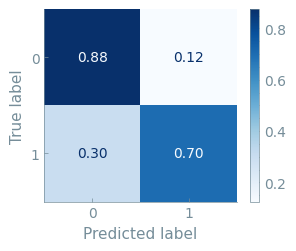

In [52]:
index_maxsize = compiled_res[compiled_res["train_size"]==max(compiled_res["train_size"])].index
conf_mats_max = [conf_mats[i] for i in index_maxsize]

actual_all, predicted_all = [], []
for index, _ in enumerate(conf_mats_max):
    preds = conf_mats_max[index]
    actual = preds["all_y_true"]
    predicted = preds["all_y_pred"]
    
    for true, pred in zip(actual, predicted):
        actual_all.append(true)
        predicted_all.append(pred)

confusion_matrix = metrics.confusion_matrix(actual_all, predicted_all)
confusion_matrix_norm = confusion_matrix.astype("float") / confusion_matrix.sum(axis=1)[:, np.newaxis]
print(confusion_matrix_norm)

cm = pycm.ConfusionMatrix(list(actual_all), list(predicted_all))
acc = cm.Overall_ACC

print(f'accuracy: {acc}')

cm_display = metrics.ConfusionMatrixDisplay(
    confusion_matrix = confusion_matrix_norm, display_labels = [0, 1])
cm_display.plot(cmap=plt.cm.Blues, include_values=True, values_format=".2f")
#plt.savefig('classif_GASIF_confusionMatrix_70_30_size45_XGBoost.pdf', bbox_inches='tight')